https://www.statsmodels.org/stable/tsa.html

In [ ]:
# BASE: https://www.kaggle.com/datasets/akshatpattiwar/daily-demand-forecasting-orderscsv?resource=download

In [ ]:
demand= read.csv("/content/Daily_Demand_Forecasting_Orders.csv", sep= ";")
demand

In [ ]:
install.packages("forecast")
install.packages("vars")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Escolhendo parâmetros para um modelo AR (p)

- Para determinar p, usamos PACF

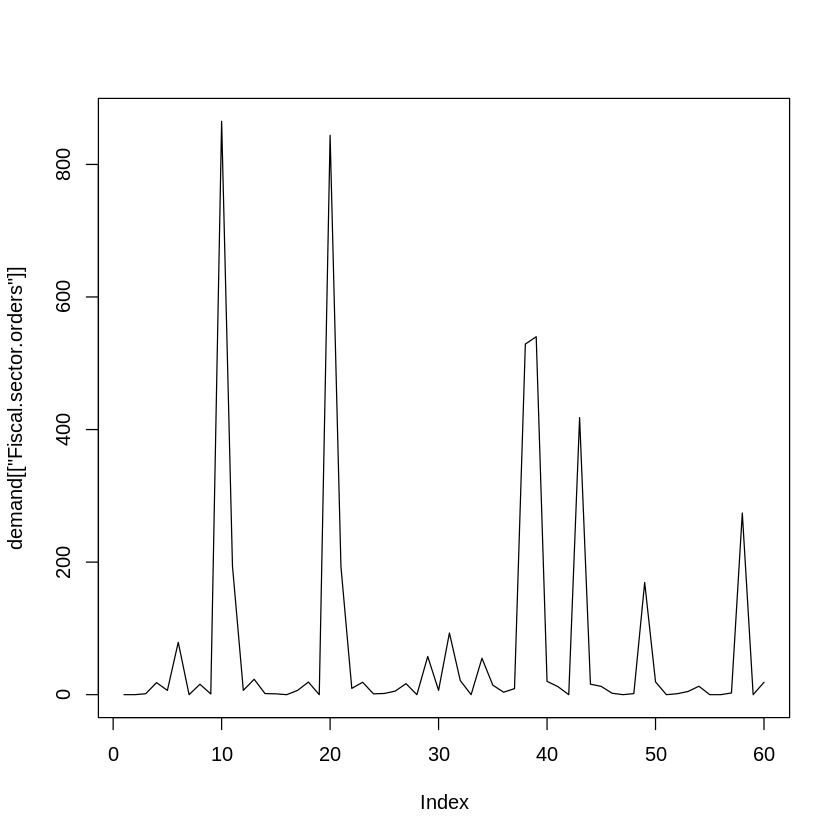

In [ ]:
plot(demand[["Fiscal.sector.orders"]], type= "l")

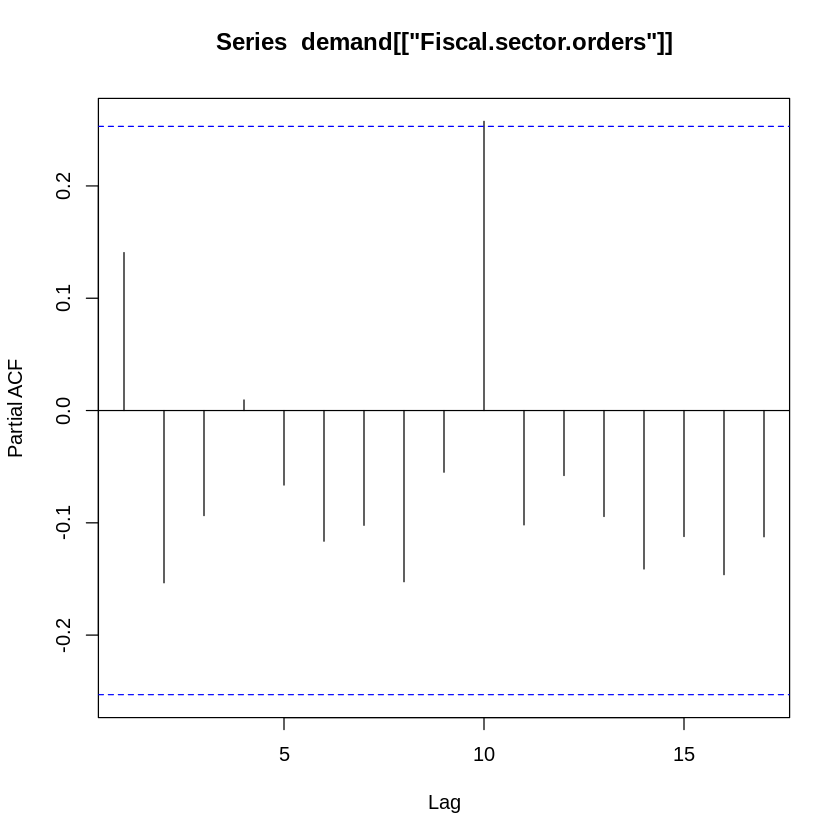

In [ ]:
pacf(demand[["Fiscal.sector.orders"]])

In [ ]:
fit= ar(x= demand[["Fiscal.sector.orders"]], method= "mle")
fit


Call:
ar(x = demand[["Fiscal.sector.orders"]], method = "mle")


Order selected 0  sigma^2 estimated as  34203

In [ ]:
est= arima(x= demand[["Banking.orders..2."]], order= c(3,0,0))
est


Call:
arima(x = demand[["Banking.orders..2."]], order = c(3, 0, 0))

Coefficients:
          ar1      ar2      ar3  intercept
      -0.1358  -0.2013  -0.3176  79075.350
s.e.   0.1299   0.1289   0.1296   2981.124

sigma^2 estimated as 1.414e+09:  log likelihood = -717.42,  aic = 1444.83

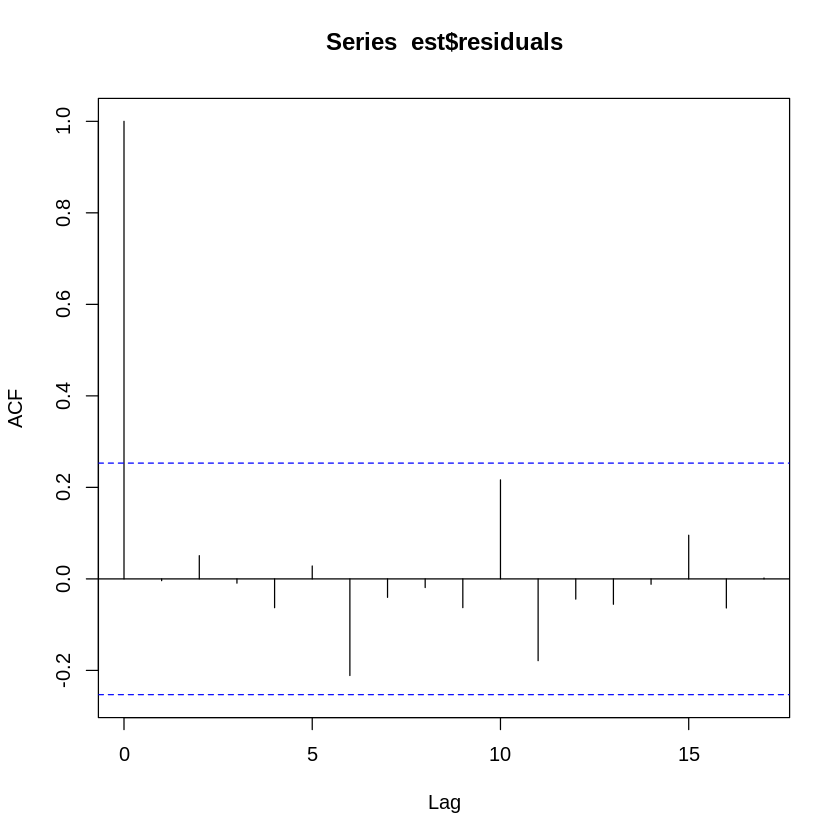

In [ ]:
acf(est$residuals)

In [ ]:
# tetste Ljung-Box
#h0: Os dados não apresentam correlação serial
#h1: Os dados apresentam correlação serial

Box.test(est$residuals, lag= 10, type= "Ljung", fitdf= 3)


	Box-Ljung test

data:  est$residuals
X-squared = 7.47, df = 7, p-value = 0.3816


# Previsão com um processo AR (p)

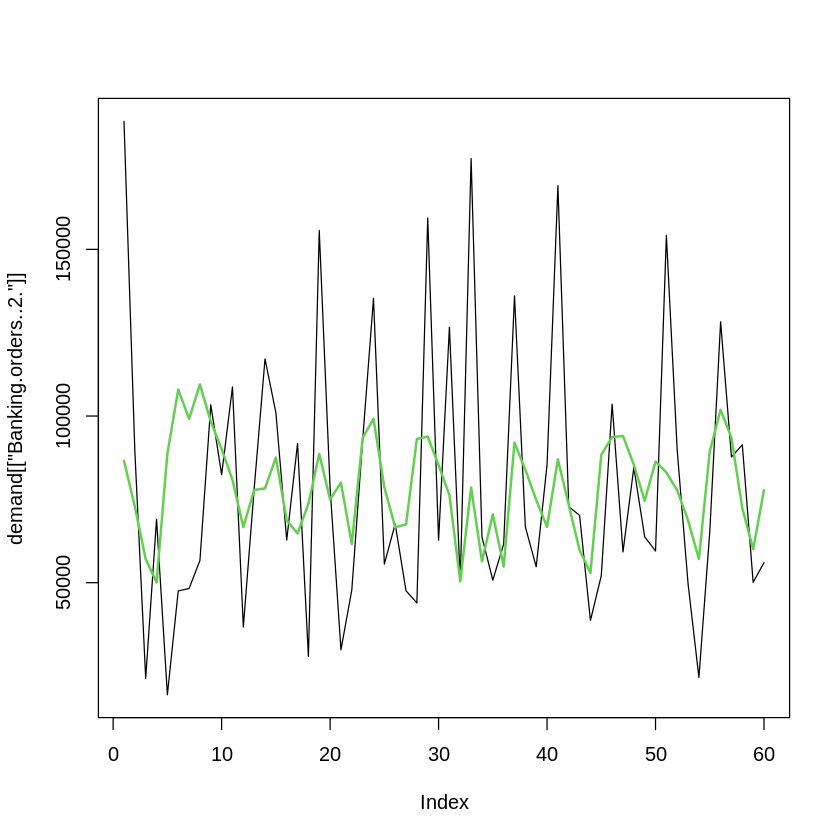

In [ ]:
require(forecast)
plot(demand[["Banking.orders..2."]], type= "l")
lines(fitted(est), col= 3, lwd= 2)

# Escolhendo os parâmetros paara um processo MA (q)
- Para determinar q, usamos ACF

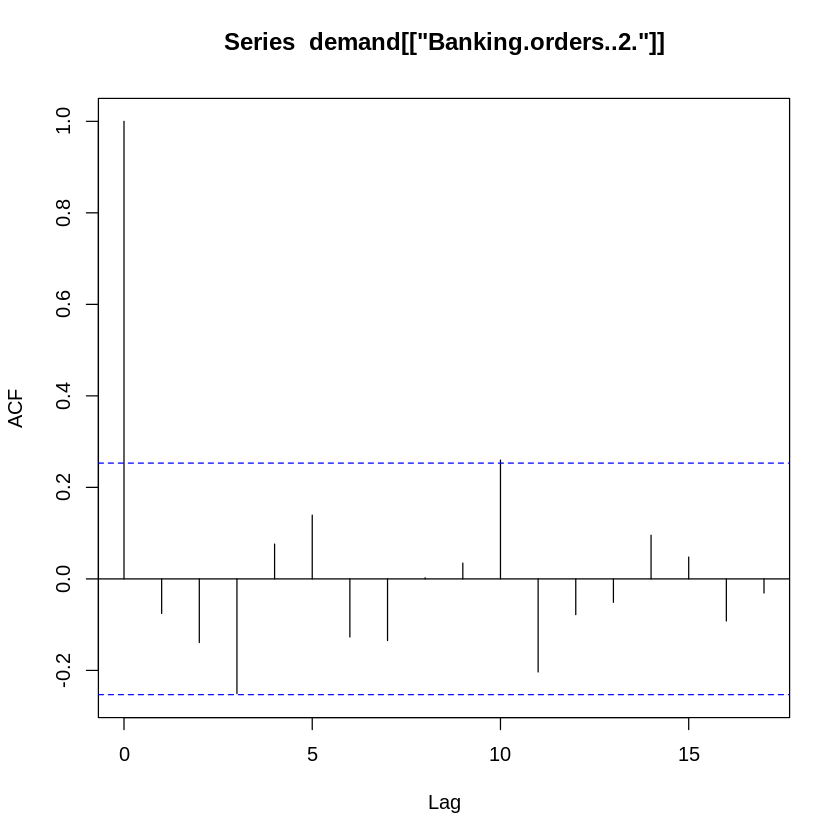

In [ ]:
# Lag de 3 e 9
acf(demand[["Banking.orders..2."]])

In [ ]:
ma.est = arima(x= demand[["Banking.orders..2."]],
              order= c(0,0,9),
              fixed= c(0,0, NA, rep(0, 5), NA, NA))
ma.est


Call:
arima(x = demand[["Banking.orders..2."]], order = c(0, 0, 9), fixed = c(0, 0, 
    NA, rep(0, 5), NA, NA))

Coefficients:
      ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8      ma9  intercept
        0    0  -0.4725    0    0    0    0    0  -0.0120  79689.809
s.e.    0    0   0.1459    0    0    0    0    0   0.1444   2674.593

sigma^2 estimated as 1.4e+09:  log likelihood = -717.31,  aic = 1442.61

In [ ]:
Box.test(ma.est$residuals, lag= 10, type= "Ljung", fitdf= 3)


	Box-Ljung test

data:  ma.est$residuals
X-squared = 7.6516, df = 7, p-value = 0.3643


# Previsão de um processo MA (q)

In [ ]:
fitted(ma.est, h= 1)

A Time Series:
 [1]  90116.64  80626.91  74090.45  38321.61  74734.77 101153.20  65930.90
 [8] 106351.80 104138.05  86938.99 102868.16  80502.02  81466.01  77619.15
[15] 100984.93  81463.10  61622.54  79660.81  88563.91  65370.99 104679.89
[22]  48047.39  73070.29 115034.16  80034.03  70052.29  70728.85  90437.86
[29]  80684.44  91533.59 101668.18  42273.27  93055.40  68187.65  75863.50
[36]  40195.15  82368.91  90605.60  69924.83  54032.55  90866.20  85839.41
[43]  64932.70  43030.64  85575.32  76561.14  82047.95  95683.35  66553.13
[50]  89532.20  85102.64  80937.97  93926.74  47468.84  75223.67 100887.60
[57]  92059.32  84459.85  67112.16  80917.23

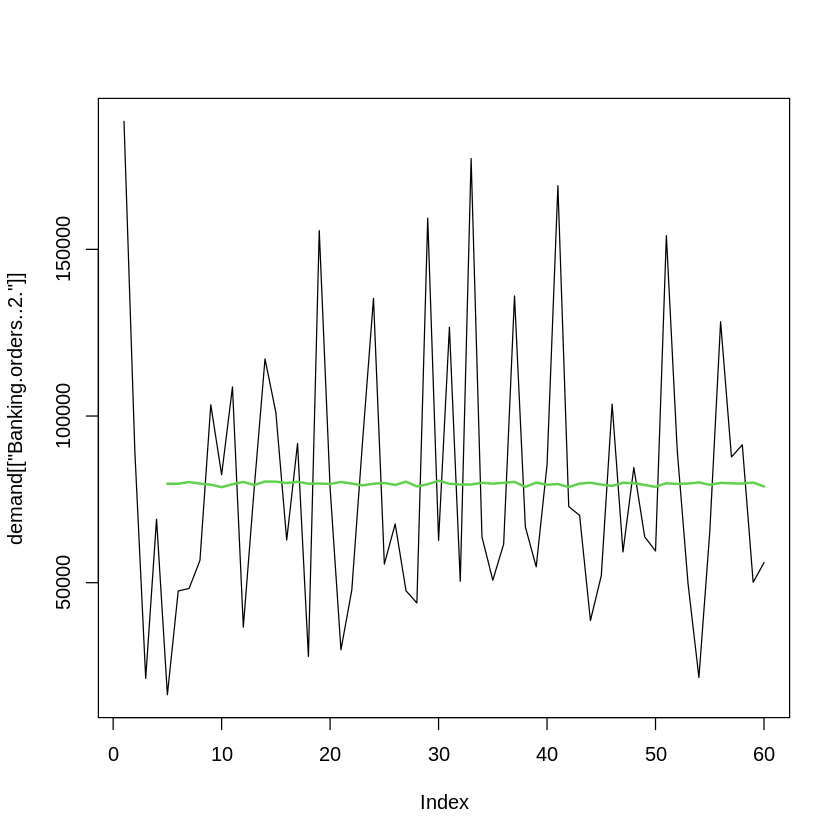

In [ ]:
plot(demand[["Banking.orders..2."]], type= "l")
lines(fitted(ma.est, h= 4), col= 3, lwd= 2)

In [ ]:
fitted(ma.est, h= 10)

A Time Series:
 [1]       NA       NA       NA       NA       NA       NA       NA       NA
 [9]       NA       NA 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[17] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[25] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[33] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[41] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[49] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[57] 79689.81 79689.81 79689.81 79689.81

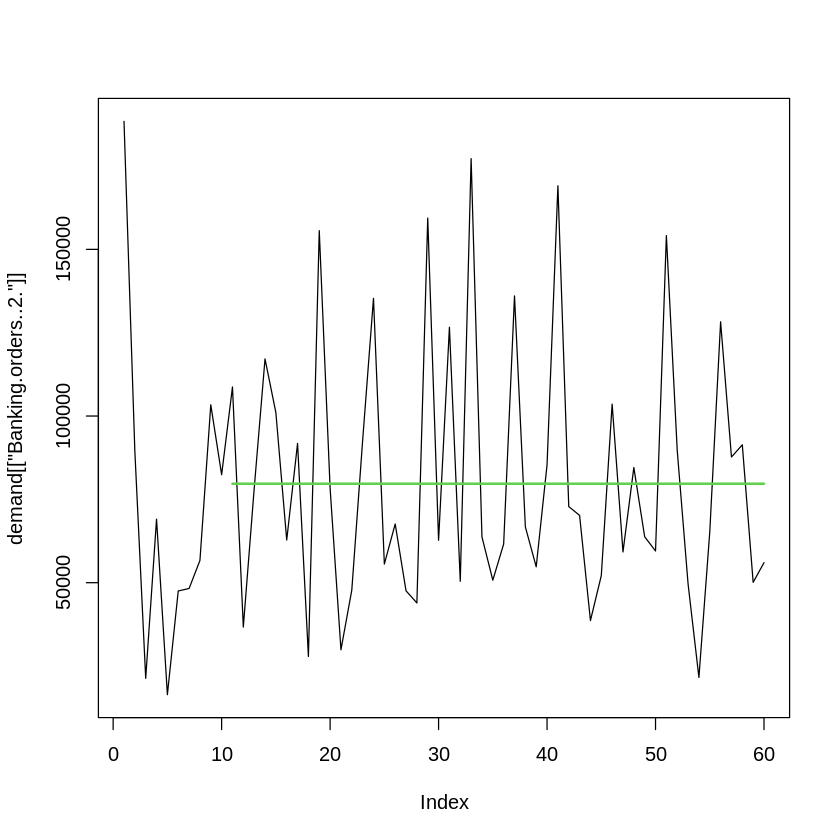

In [ ]:
plot(demand[["Banking.orders..2."]], type= "l")
lines(fitted(ma.est, h= 10), col= 3, lwd= 2)

# Modelos autorregressivos integrados de Média Movel

In [ ]:
require(forecast)
set.seed(1017)
y= arima.sim(n= 1000, list(ar= c(0.8, -0.4), ma= c(-0.7)))

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



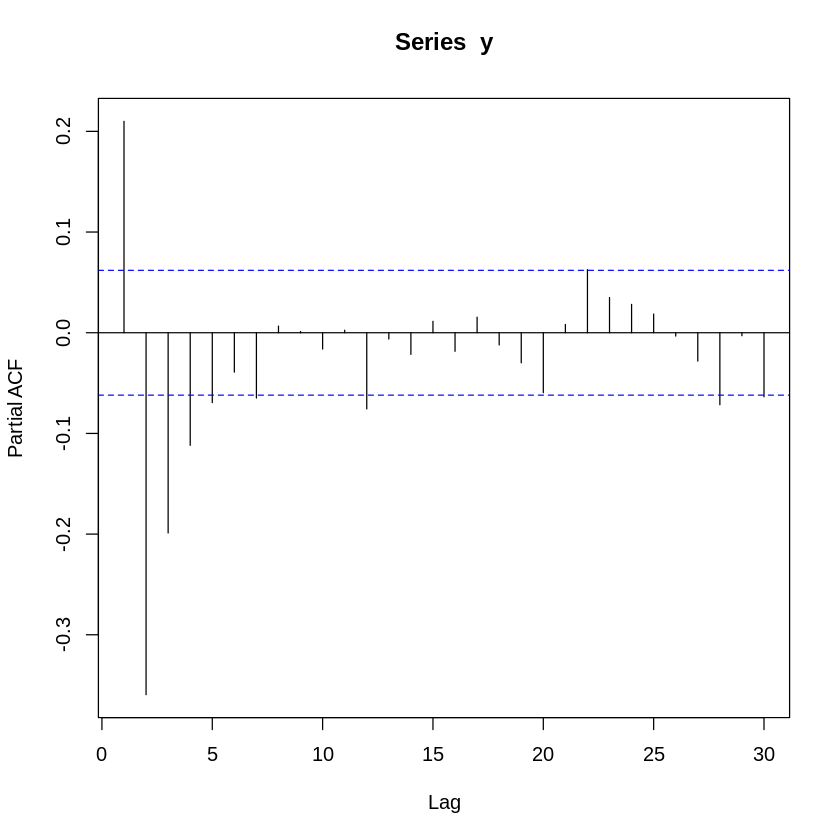

In [ ]:
pacf(y)

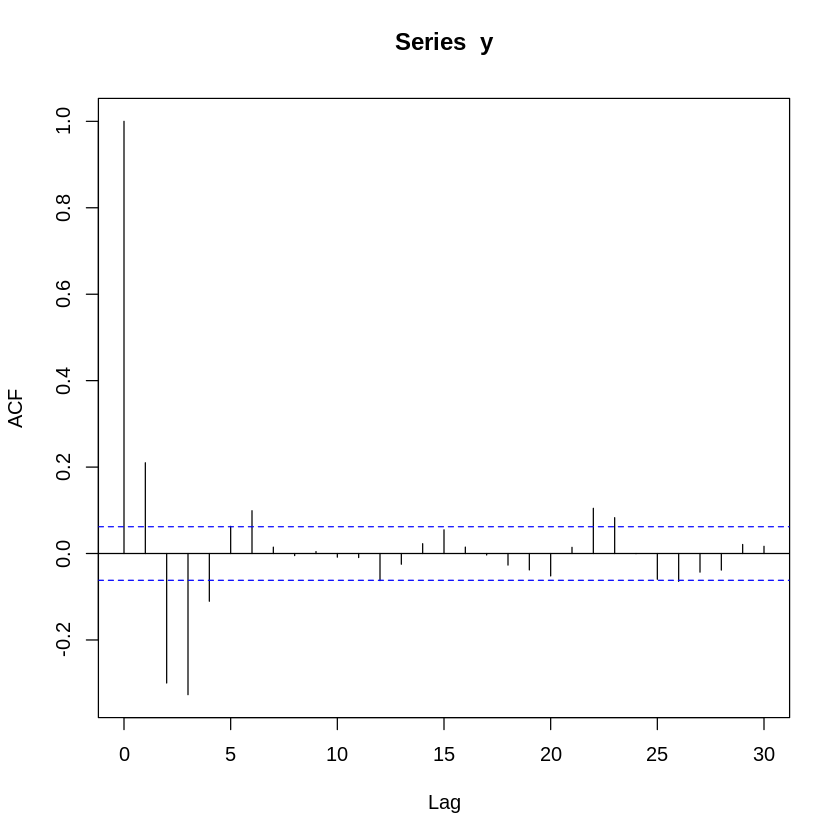

In [ ]:
acf(y)

Warning message in par(mfrom = c(2, 1)):
“"mfrom" is not a graphical parameter”


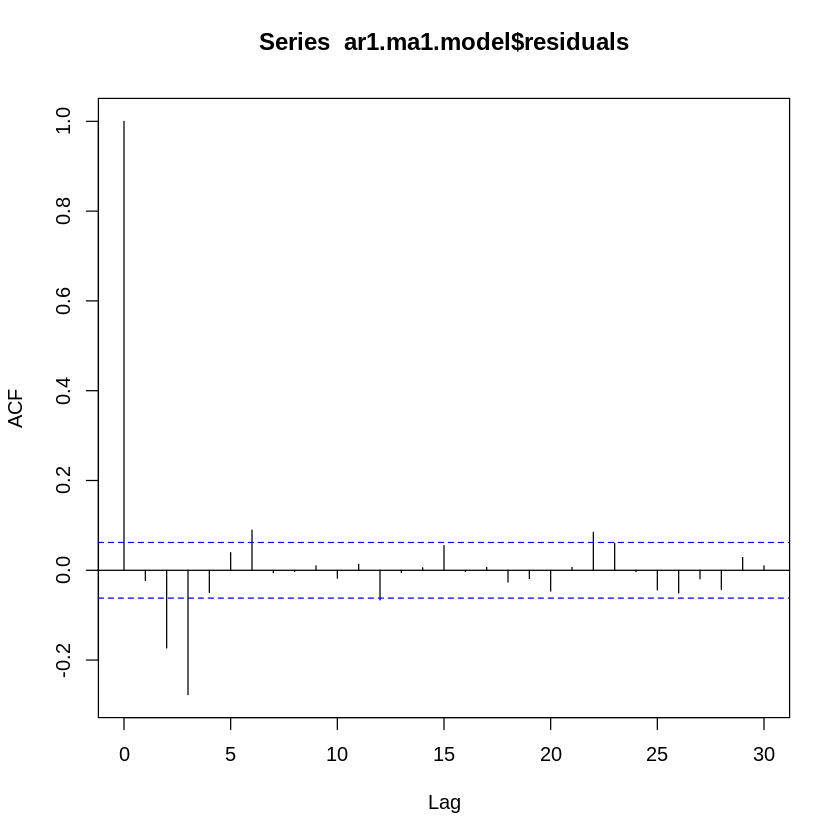

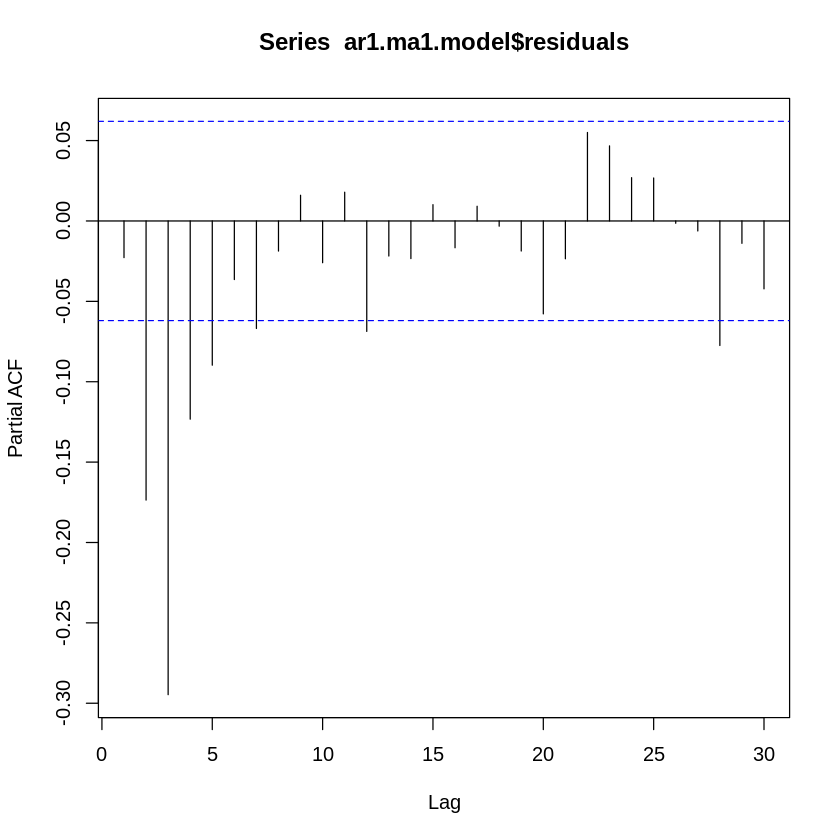

In [ ]:
#os residuos mostram valores PACF enormes, sugerinfo que não representamos totalmente o comportamento autogressivo
ar1.ma1.model= Arima(y, order= c(1,0,1))
par(mfrom= c(2,1))
acf(ar1.ma1.model$residuals)
pacf(ar1.ma1.model$residuals)

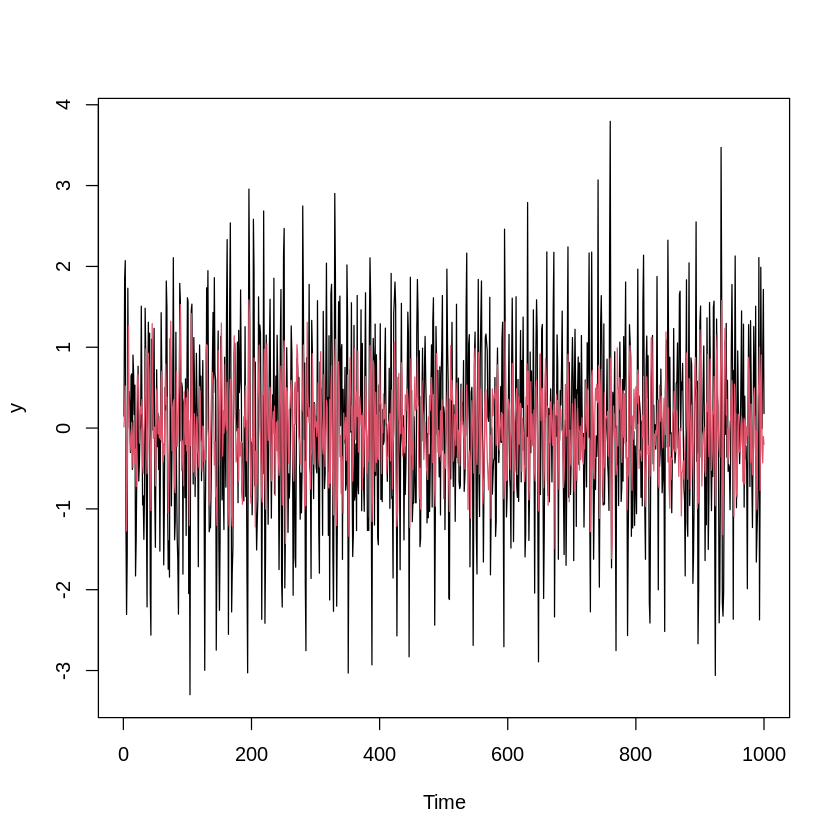

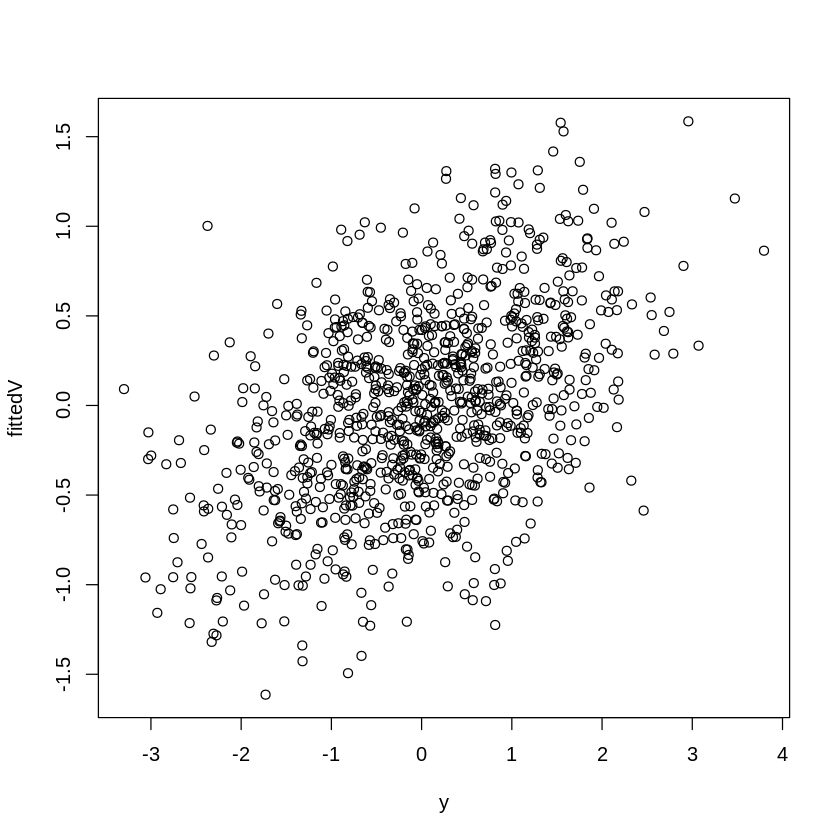

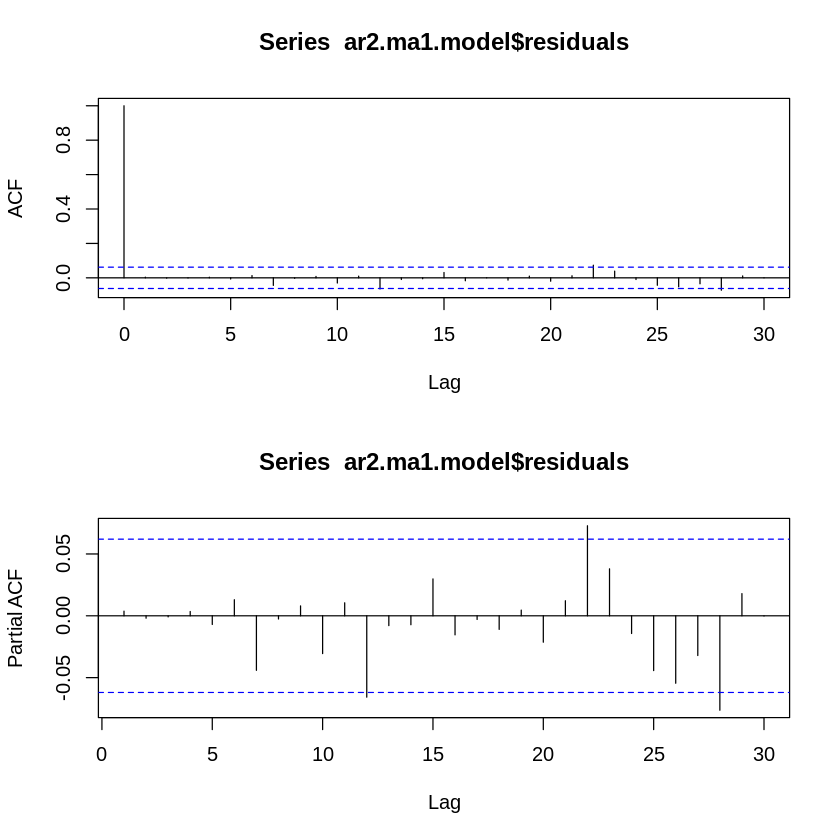

In [ ]:
#Aumentando o componente  AR de ordem superior.
ar2.ma1.model= Arima(y, order= c(2,0,1))
fittedV= ar2.ma1.model$fitted

plot(y, type= "l")
lines(fittedV, col= 2)
plot(y, fittedV)
par(mfrow= c(2,1))
acf(ar2.ma1.model$residuals)
pacf(ar2.ma1.model$residuals)

In [ ]:
#Busca automatica
est= auto.arima(demand[["Banking.orders..2."]],
                stepwise= FALSE,
                max.p= 3,
                max.q= 9)
est

Series: demand[["Banking.orders..2."]] 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
          ma1      ma2      ma3       mean
      -0.0645  -0.1144  -0.4796  79914.783
s.e.   0.1327   0.1150   0.1915   1897.407

sigma^2 = 1.467e+09:  log likelihood = -716.71
AIC=1443.42   AICc=1444.53   BIC=1453.89

In [ ]:
# Mesma resposta pelo metodo heuristico
est= auto.arima(y,
                stepwise= FALSE,
                max.p= 3,
                max.q= 9)
est

Series: y 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.7847  -0.4622  -0.6123
s.e.  0.0487   0.0285   0.0522

sigma^2 = 1.019:  log likelihood = -1427.21
AIC=2862.41   AICc=2862.45   BIC=2882.04

# Autorregressão Vetorial

In [ ]:
library(vars)

In [ ]:
var= VARselect(demand[["Fiscal.sector.orders"]], lag.max= 4, type= "const")
var$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

In [ ]:
var$criteria

,1,2,3,4
AIC(n),10.55139,10.56164,10.58767,10.62327
HQ(n),10.57944,10.60371,10.64376,10.69338
SC(n),10.62373,10.67014,10.73234,10.80410
FPE(n),38231.75663,38628.48640,39652.68929,41099.30984
